<a href="https://colab.research.google.com/github/AmandaMadawala/CRM-CourseWork/blob/main/coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install yfinance
!pip install yahoofinancials

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for yahoofinancials: filename=yahoofinancials-1.20-py3-none-any.whl size=38618 sha256=8590c240268641232c19ba7f29f6adae88f457997bdaae4080833700b7b64aa5
  Stored in directory: /root/.cache/pip/wheels/b0/e1/ca/e683b02e57db550881c8ebb89ba3eccb7a5c0ebfad7f03acea
Successfully built yahoofinancials


In [5]:
#(1)A)
import pandas as pd

# Define a custom User-Agent header to mimic a web browser
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

#Load the S&P 500 company list. The actual list is usually the second table (index 1).
table = pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies", storage_options=headers)[1]

# Extract ticker symbols from the 'Symbol' column and format them for Yahoo Finance
sp500 = table["Symbol"].str.replace(".","-", regex=False).tolist()

print(sp500[:10])

['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL', 'A']


In [6]:
#(1)B)
import yfinance as yf
data = yf.download(sp500, start="2022-01-01", end="2025-01-01", group_by=("ticker"))

display(data.head())

/tmp/ipython-input-1986742727.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(sp500, start="2022-01-01", end="2025-01-01", group_by=("ticker"))
[*********************100%***********************]  503 of 503 completed
ERROR:yfinance:
2 Failed downloads:
ERROR:yfinance:['SOLS', 'Q']: YFPricesMissingError('possibly delisted; no price data found  (1d 2022-01-01 -> 2025-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1641013200, endDate = 1735707600")')


Ticker              C                                                   TSLA  \
Price            Open       High        Low      Close    Volume        Open   
Date                                                                           
2022-01-03  52.737953  54.832645  52.677613  54.393017  30508500  382.583344   
2022-01-04  55.220547  55.798100  54.772303  54.815403  30303600  396.516663   
2022-01-05  55.255029  55.522258  54.117172  54.177513  25149100  382.216675   
2022-01-06  55.358471  56.298062  54.746440  55.953262  33334200  359.000000   
2022-01-07  56.186002  57.366963  56.186002  56.703209  26548200  360.123322   

Ticker                                                     ...         MCD  \
Price             High         Low       Close     Volume  ...        Open   
Date                                                       ...               
2022-01-03  400.356659  378.679993  399.926666  103931400  ...  247.392515   
2022-01-04  402.666656  374.350006  383.196655  100248300  ...  247.401734   
2022-01-05  390.113342  360.336670  362.706665   80119800  ...  247.218100   
2022-01-06  362.666656  340.166656  354.899994   90336600  ...  246.134840   
2022-01-07  360.309998  336.666656  342.320007   84164700  ...  246.538747   

Ticker                                                         MPWR  \
Price             High         Low       Close   Volume        Open   
Date                                                                  
2022-01-03  248.530857  243.784771  246.557129  2750600  477.856139   
2022-01-04  248.916433  246.272580  246.492920  2506000  485.104788   
2022-01-05  248.117753  245.014899  245.281128  2473000  473.629342   
2022-01-06  248.558380  245.841073  247.576111  2908400  447.384649   
2022-01-07  248.016745  245.106665  245.161743  2209100  451.290756   

Ticker                                                  
Price             High         Low       Close  Volume  
Date                                                    
2022-01-03  482.918515  472.230178  480.829437  300800  
2022-01-04  489.885403  461.726481  477.331451  328400  
2022-01-05  474.989670  447.365186  447.481781  473700  
2022-01-06  455.391206  436.676889  452.417877  387700  
2022-01-07  456.498877  431.604773  432.090607  411200  

[5 rows x 2517 columns]

In [7]:
from yahoofinancials import YahooFinancials

#Example for one stock
yahoo_fin = YahooFinancials('AAPL')
historical_data = yahoo_fin.get_historical_price_data('2022-01-01', '2025-01-01', 'daily')

print(historical_data)

{'AAPL': {'eventsData': {}}}


In [8]:
#(1)C)

# The 'data' DataFrame itself now represents the 'Close' prices for each ticker.
adj_close_data = data

# Remove tickers (columns) from adj_close_data with more than 10% missing values
# This identifies the tickers that have enough 'Close' data
valid_tickers_df = adj_close_data.dropna(axis=1, thresh=int(len(adj_close_data) * 0.9))
valid_tickers = valid_tickers_df.columns.tolist() # Extract valid ticker symbols

# Filter the original data to keep only valid tickers
data = data[valid_tickers]

# Fill small remaining gaps across all remaining metrics for valid tickers
data = data.ffill().bfill()
print(data)

Ticker              C                                                   TSLA  \
Price            Open       High        Low      Close    Volume        Open   
Date                                                                           
2022-01-03  52.737953  54.832645  52.677613  54.393017  30508500  382.583344   
2022-01-04  55.220547  55.798100  54.772303  54.815403  30303600  396.516663   
2022-01-05  55.255029  55.522258  54.117172  54.177513  25149100  382.216675   
2022-01-06  55.358471  56.298062  54.746440  55.953262  33334200  359.000000   
2022-01-07  56.186002  57.366963  56.186002  56.703209  26548200  360.123322   
...               ...        ...        ...        ...       ...         ...   
2024-12-24  68.207683  69.287720  68.052006  69.083389   6544900  435.899994   
2024-12-26  68.635810  69.540706  68.606621  69.423943   6341700  465.160004   
2024-12-27  68.947169  69.599081  68.635808  69.083389   7743100  449.519989   
2024-12-30  68.285530  68.917985  67.906

In [9]:
#(2)A)
#Daily return calculation
daily_return = data.pct_change().dropna()

daily_return.head()

Ticker             C                                              TSLA  \
Price           Open      High       Low     Close    Volume      Open   
Date                                                                     
2022-01-04  0.047074  0.017607  0.039764  0.007765 -0.006716  0.036419   
2022-01-07  0.014949  0.018986  0.026295  0.013403 -0.203575  0.003129   
2022-01-10  0.019638  0.006461  0.000614  0.003801  0.080815 -0.074391   
2022-01-11 -0.001204  0.004479  0.014566  0.016356 -0.182643  0.053670   
2022-01-12  0.021091  0.020363  0.011334  0.002533  0.192862  0.023897   

Ticker                                              ...       MCD  \
Price           High       Low     Close    Volume  ...      Open   
Date                                                ...             
2022-01-04  0.005770 -0.011434 -0.041833 -0.035438  ...  0.000037   
2022-01-07 -0.006498 -0.010289 -0.035447 -0.068321  ...  0.001641   
2022-01-10 -0.020196 -0.029703  0.030342  0.090897  ... -0.006889   
2022-01-11  0.015815  0.060020  0.005935 -0.280474  ... -0.012073   
2022-01-12  0.036241  0.032508  0.039290  0.267557  ... -0.000455   

Ticker                                                      MPWR            \
Price               High       Low     Close    Volume      Open      High   
Date                                                                         
2022-01-04  1.551419e-03  0.010205 -0.000260 -0.088926  0.015169  0.014427   
2022-01-07 -2.179105e-03 -0.002987 -0.009752 -0.240441  0.008731  0.002432   
2022-01-10 -1.276981e-02 -0.018689 -0.009923  0.413426 -0.056949 -0.041549   
2022-01-11 -1.038526e-02 -0.006450 -0.008661  0.026838  0.032968  0.009816   
2022-01-12 -2.811420e-08 -0.000154 -0.004578 -0.050589  0.012200  0.019837   

Ticker                                    
Price            Low     Close    Volume  
Date                                      
2022-01-04 -0.022243 -0.007275  0.091755  
2022-01-07 -0.011615 -0.044930  0.060614  
2022-01-10 -0.040546  0.010434  0.073200  
2022-01-11  0.027688  0.007077  0.015409  
2022-01-12  0.015959 -0.007956 -0.197501  

[5 rows x 2480 columns]

In [10]:
#(2)B)
import yfinance as yf
import pandas as pd
import numpy as np

#Download the S&P 500 index
index_data = yf.download("^GSPC", start="2022-01-01", end="2025-01-01") ["Close"]
index_returns = index_data.pct_change().dropna()
index_returns = pd.DataFrame(index_returns)
index_returns.columns = ["Market_Return"]


#Align stock and index dates
# Select only 'Adj Close' returns from daily_return to flatten the column MultiIndex
daily_stock_returns = daily_return.xs('Close', level=1, axis=1)
aligned_returns = daily_stock_returns.join(index_returns, how="inner")

#Split into two datasets
stocks = aligned_returns.drop(columns=['Market_Return'])
market = aligned_returns['Market_Return']

#Calculate Beta for each stock
beta_values = {}

market_std = market.std()

for ticker in stocks.columns:
    stock_std = stocks[ticker].std()
    correlation = stocks[ticker].corr(market)
    beta = correlation * (stock_std / market_std)
    beta_values[ticker] = beta

beta_series = pd.Series(beta_values, name="Beta")

print("Beta Values for all S&P 500 stocks:\n")
display(beta_series.to_frame())

/tmp/ipython-input-2137833698.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  index_data = yf.download("^GSPC", start="2022-01-01", end="2025-01-01") ["Close"]
[*********************100%***********************]  1 of 1 completed


Beta Values for all S&P 500 stocks:



,Beta
C,1.007084
TSLA,2.013404
NOC,0.309448
DG,0.582495
BKNG,1.113350
...,...
CNC,0.516175
GEN,0.714229
CSX,0.834352
MCD,0.488010


In [11]:
#(2)C)
#Calculate daily standard deviation
daily_std = daily_return.std()

#Annualize the volatility
annual_volatility = daily_std * np.sqrt(252)

display(annual_volatility.to_frame())

0
Ticker Price           
C      Open    0.286345
       High    0.281633
       Low     0.285324
       Close   0.287353
       Volume  6.129364
...                 ...
MPWR   Open    0.527327
       High    0.461098
       Low     0.504077
       Close   0.545947
       Volume  7.800901

[2480 rows x 1 columns]

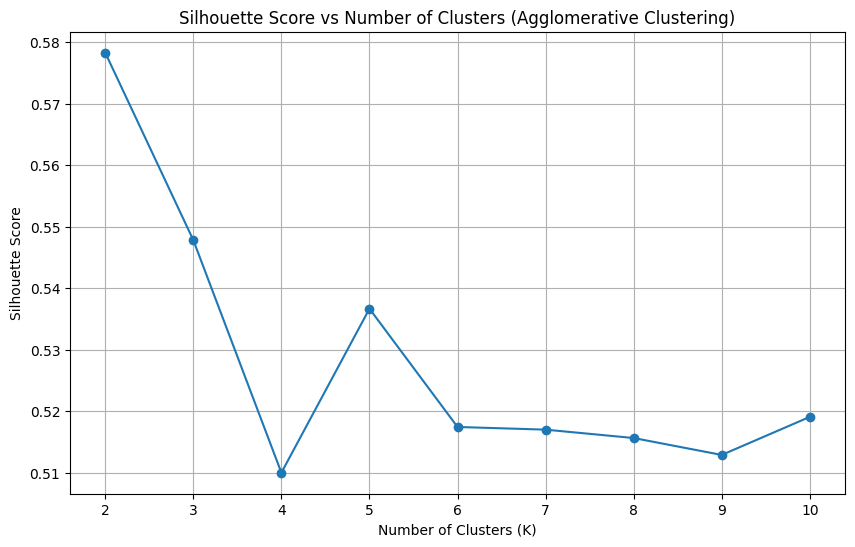

In [15]:
#Silhouette Score Graph for Agglomerative Clustering

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Convert beta_series into a DataFrame
beta_df = beta_series.to_frame(name="Beta")

# Scale the Beta values
scaler = StandardScaler()
beta_scaled = scaler.fit_transform(beta_df)

# Calculate silhouette score for K = 2 to 10
silhouette_scores = {}

for k in range(2, 11):
    model = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = model.fit_predict(beta_scaled)
    score = silhouette_score(beta_scaled, labels)
    silhouette_scores[k] = score

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()), marker='o')
plt.title("Silhouette Score vs Number of Clusters (Agglomerative Clustering)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()


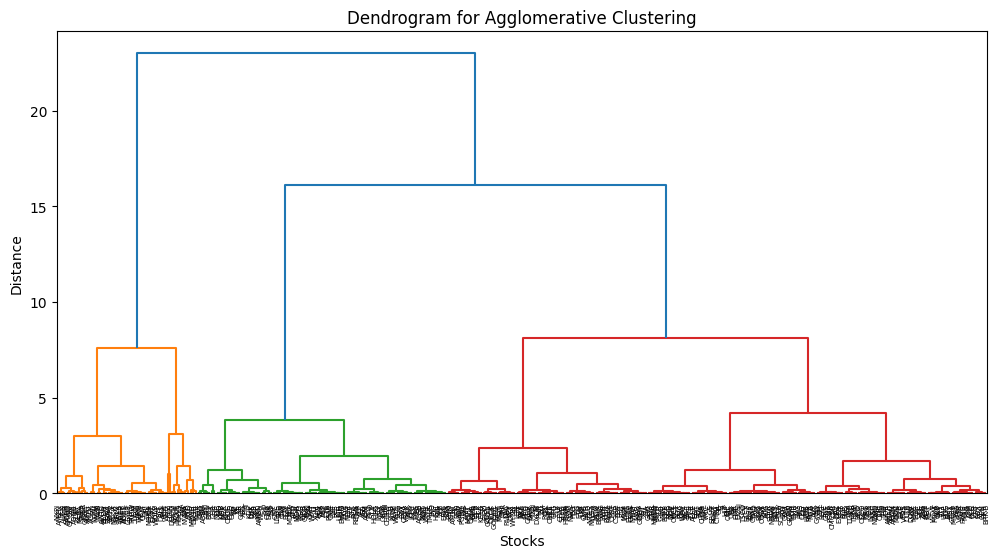

,Beta,Cluster
C,1.007084,1
TSLA,2.013404,0
NOC,0.309448,2
DG,0.582495,2
BKNG,1.113350,3


In [16]:
#(3)C)
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

#Assume beta_series is already calculates from Task 2
beta_df = beta_series.to_frame(name="Beta")

#Normalization
scaler = StandardScaler()
beta_scaled = scaler.fit_transform(beta_df)

#Dendrogram to determine optimal K
plt.figure(figsize=(12, 6))
linkage_matrix = linkage(beta_scaled, method='ward')
dendrogram(linkage_matrix, labels=beta_df.index, leaf_rotation=90)
plt.title("Dendrogram for Agglomerative Clustering")
plt.xlabel("Stocks")
plt.ylabel("Distance")
plt.show()

#Choose a K based on dendrogam
agglom = AgglomerativeClustering(n_clusters=4, linkage='ward')
clusters = agglom.fit_predict(beta_scaled)

#Attach cluster labels to dataframe
beta_df["Cluster"] = clusters

#Preview Results
beta_df.head()

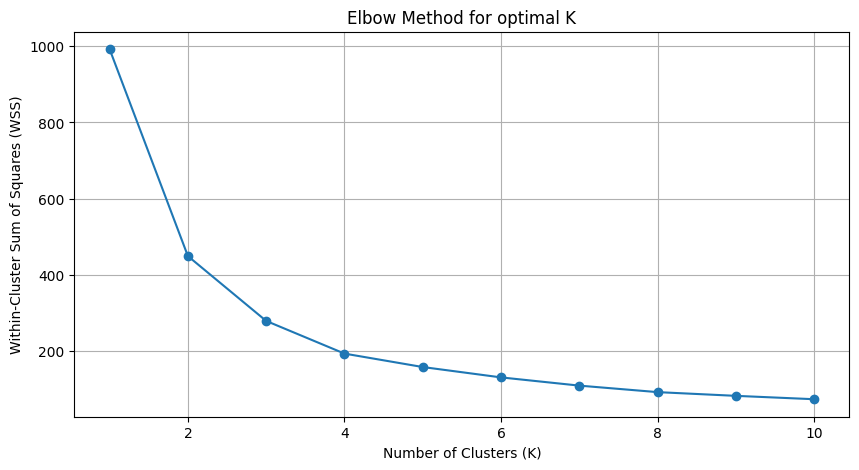

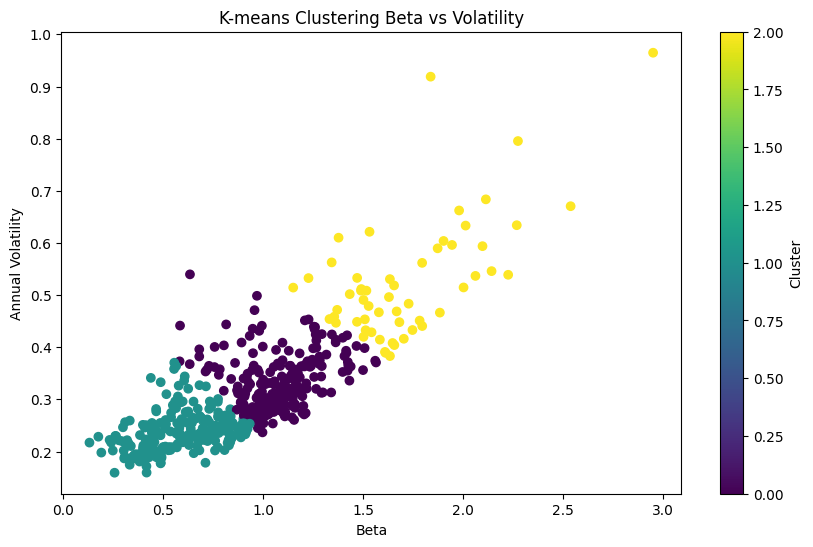

,Beta,Volatility,Cluster
C,1.007084,0.287353,0
TSLA,2.013404,0.633301,2
NOC,0.309448,0.256197,1
DG,0.582495,0.372958,0
BKNG,1.113350,0.324138,0
...,...,...,...
CNC,0.516175,0.309927,1
GEN,0.714229,0.324984,1
CSX,0.834352,0.248219,1
MCD,0.488010,0.178296,1


In [17]:
#(4)C)
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

#Combine Beta and Annual Volatility into one DataFrame
kmeans_df = pd.DataFrame({
    "Beta": beta_series,
    "Volatility": annual_volatility.xs('Close', level='Price')
}).dropna()

#Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(kmeans_df)

#Elbow method to choose optimal K
wss = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Added n_init for KMeans
    kmeans.fit(scaled_data)
    wss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(k_range, wss, marker='o')
plt.title("Elbow Method for optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within-Cluster Sum of Squares (WSS)")
plt.grid(True)
plt.show()

#Implement K-means with chosen K
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10) # Added n_init for KMeans
cluster_labels = kmeans.fit_predict(scaled_data)

#Add cluster labels to the dataset
kmeans_df["Cluster"] = cluster_labels

#Visualization of clusters
plt.figure(figsize=(10, 6))
plt.scatter(kmeans_df["Beta"], kmeans_df["Volatility"], c=kmeans_df["Cluster"], cmap="viridis")
plt.title("K-means Clustering Beta vs Volatility")
plt.xlabel("Beta")
plt.ylabel("Annual Volatility")
plt.colorbar(label="Cluster")
plt.show()

display(kmeans_df)

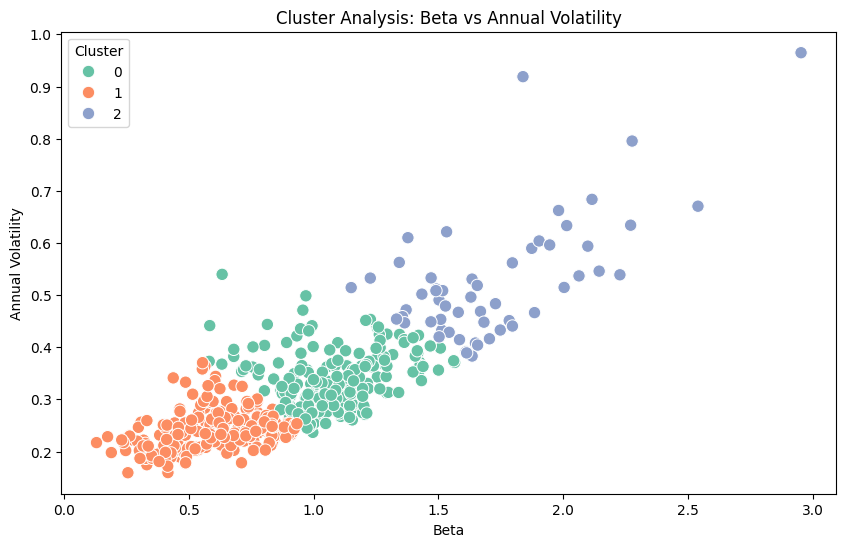

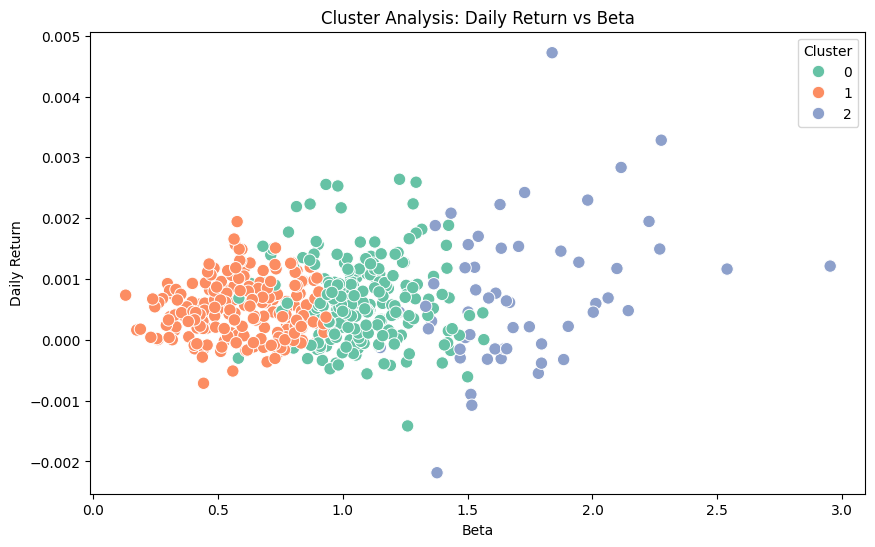

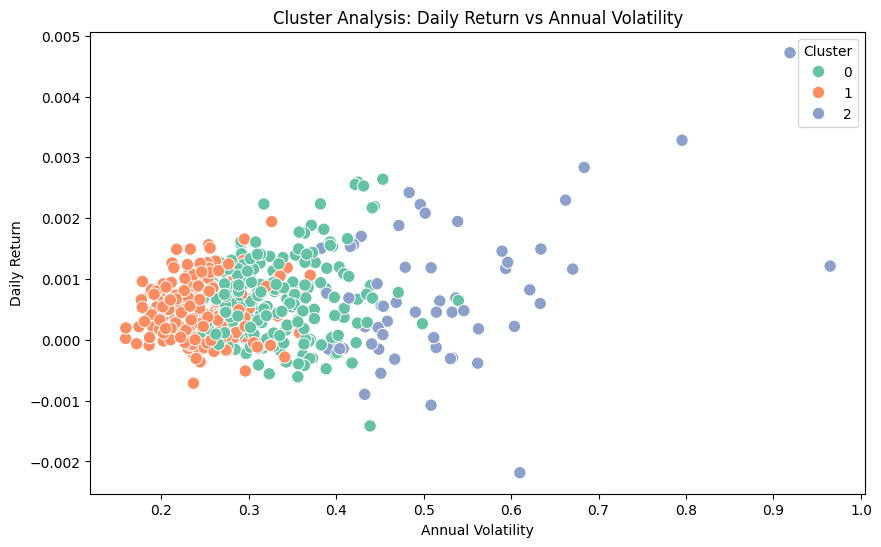

In [20]:
#(5)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


#Extract daily close returns
annual_vol_close = annual_volatility.xs('Close', level='Price')
daily_return_close = daily_return.xs('Close', level='Price', axis=1).mean()

df_clusters = kmeans_df.copy()
df_clusters['Daily_Return'] = daily_return_close
df_clusters = df_clusters.rename(columns={'Volatility': 'Annual_Volatility'})

# Remove any rows with NaN values that might result from misaligned indices
df_clusters = df_clusters.dropna()

# 1. Beta vs Annual Volatility
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_clusters, x='Beta', y='Annual_Volatility', hue='Cluster', palette='Set2', s=80)
plt.title('Cluster Analysis: Beta vs Annual Volatility')
plt.xlabel('Beta')
plt.ylabel('Annual Volatility')
plt.legend(title='Cluster')
plt.show()

# 2. Daily Return vs Beta
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_clusters, x='Beta', y='Daily_Return', hue='Cluster', palette='Set2', s=80)
plt.title('Cluster Analysis: Daily Return vs Beta')
plt.xlabel('Beta')
plt.ylabel('Daily Return')
plt.legend(title='Cluster')
plt.show()

# 3. Daily Return vs Annual Volatility
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_clusters, x='Annual_Volatility', y='Daily_Return', hue='Cluster', palette='Set2', s=80)
plt.title('Cluster Analysis: Daily Return vs Annual Volatility')
plt.xlabel('Annual Volatility')
plt.ylabel('Daily Return')
plt.legend(title='Cluster')
plt.show()